
# 4: Einführung in pandas: Datenvisualisierungen



### Loading Packages

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---
## 1. pandas: Chart Visualization

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### 1.1 Basic Plots

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot

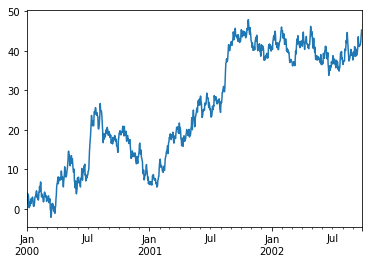

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

### 1.2 Other Plots

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

#### Histograms:
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms

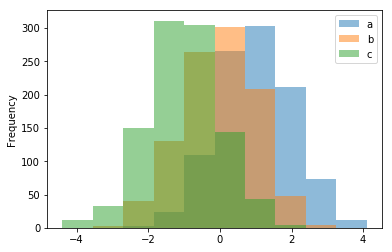

In [3]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)

plt.figure();
df4.plot.hist(alpha=0.5);

#### Barplots:
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#bar-plots

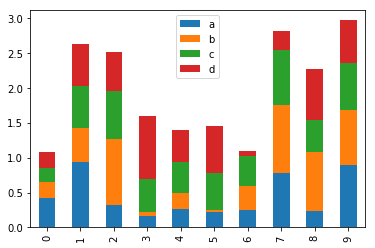

In [4]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar(stacked=True);

#### Boxplots:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots

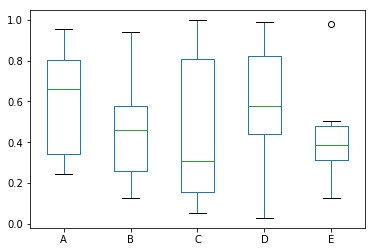

In [5]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df.plot.box();

#### Grouped Boxplots:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
    

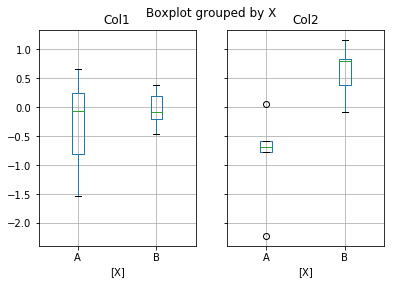

In [6]:
df = pd.DataFrame(np.random.randn(10, 2),

                  columns=['Col1', 'Col2'])

df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',

                     'B', 'B', 'B', 'B', 'B'])

boxplot = df.boxplot(by='X')

#### Scatterplots:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

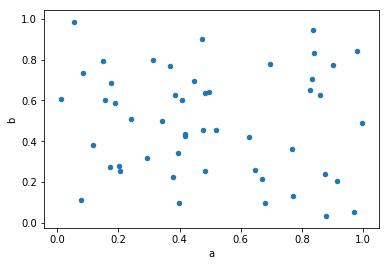

In [7]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)

df.plot.scatter(x="a", y="b");

---
## 2. pandas: Table Visualization

https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

### 2.1 Change Table Style

In [8]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2.style

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [9]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [10]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


### 2.2 Export Table to Latex or HTML
- https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Export-to-LaTeX
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.to_latex.html

In [11]:
df = pd.DataFrame([[1,2], [3,4]])
df

,0,1
0,1,2
1,3,4


In [12]:
df.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  0 &  1 \\\\\n\\midrule\n0 &  1 &  2 \\\\\n1 &  3 &  4 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [13]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>3</td>\n      <td>4</td>\n    </tr>\n  </tbody>\n</table>'